<a href="https://colab.research.google.com/github/iamMchoi/CNN/blob/master/MyMNIST_OpenCV_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
file = files.upload()
#Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable. Saving photo1.jpg to photo1.jpg

Saving Number.jpg to Number (3).jpg


In [0]:
#Read image file
for fn in file.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(file[fn])))
  
  #Read image file // fn is file's keys of dictionary. It is read in the for root
  #img = cv2.imread(fn,cv2.IMREAD_GRAYSCALE)  #When read, it makes gray image
  img = cv2.imread(fn)

User uploaded file "Number.jpg" with length 108183 bytes


## How to recognize / detect number area at image file

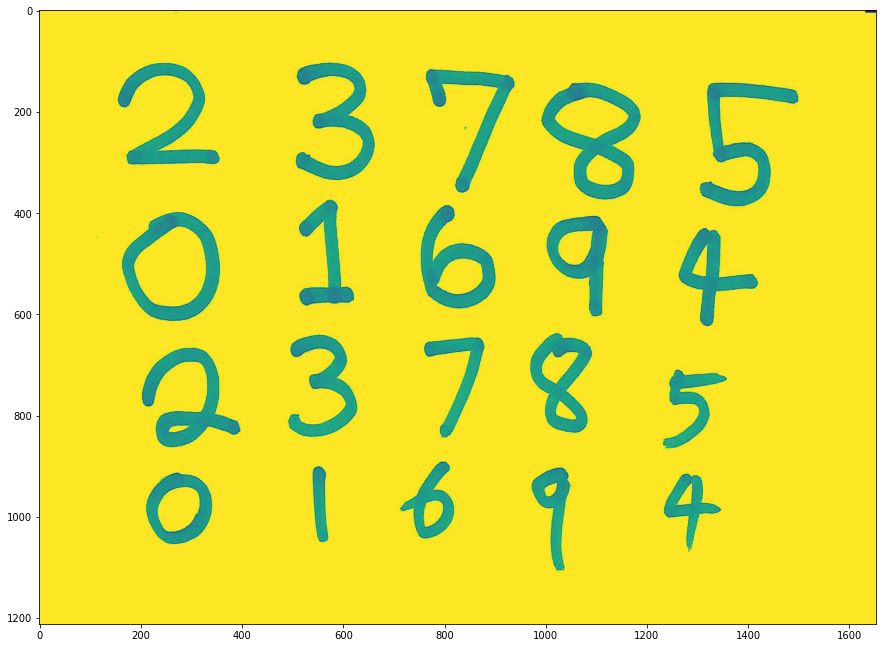

In [0]:
##Change Color into Gray 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Drawing the image file
plt.figure(figsize=(15,12)) # It is just disply area size, So it is ok to erase if want
plt.imshow(img_gray)

In [0]:
# The reason to use GuassianBlur is to erase noise.
#img_blur = cv2.GaussianBlur(img_gray,(5,5),0)

In [0]:
#This part is to get rectangles in the image 
# 100, 230 is properly threshold value. It is try and error to find properly value.

ret, img_th = cv2.threshold(img_gray, 200, 230, cv2.THRESH_BINARY_INV)
contours, hierachy = cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)   # Finding Box
rects = [cv2.boundingRect(each) for each in contours]
print(rects)
print(len(rects))

[(1235, 915, 113, 154), (212, 913, 130, 141), (974, 903, 76, 204), (541, 901, 31, 150), (713, 892, 107, 151), (1233, 710, 126, 155), (203, 666, 195, 197), (761, 646, 119, 198), (492, 641, 137, 201), (971, 638, 122, 196), (1264, 431, 156, 193), (1003, 406, 121, 199), (164, 399, 194, 215), (754, 385, 148, 205), (514, 374, 109, 210), (841, 231, 3, 3), (1306, 143, 194, 245), (993, 143, 196, 231), (765, 117, 175, 244), (507, 104, 156, 232), (156, 104, 201, 201), (270, 5, 1, 2), (1632, 0, 22, 5)]
23


In [0]:
#If get too many rectangles, reduce the numbers to fit realy data.
#so First, check volume to select only realy data
tmp = [w*h for (x,y,w,h) in rects]
tmp.sort()
print(tmp)

[2, 9, 110, 4650, 15504, 16157, 17402, 18330, 19530, 22890, 23562, 23912, 24079, 27537, 30108, 30340, 36192, 38415, 40401, 41710, 42700, 45276, 47530]


In [0]:
#Select only under range
rects =[(x,y,w,h) for (x,y,w,h) in rects if((w*h>500)and(w*h<50000))]
print(rects)
print(len(rects))

[(1235, 915, 113, 154), (212, 913, 130, 141), (974, 903, 76, 204), (541, 901, 31, 150), (713, 892, 107, 151), (1233, 710, 126, 155), (203, 666, 195, 197), (761, 646, 119, 198), (492, 641, 137, 201), (971, 638, 122, 196), (1264, 431, 156, 193), (1003, 406, 121, 199), (164, 399, 194, 215), (754, 385, 148, 205), (514, 374, 109, 210), (1306, 143, 194, 245), (993, 143, 196, 231), (765, 117, 175, 244), (507, 104, 156, 232), (156, 104, 201, 201)]
20


## How to automatically cut numbers area at image

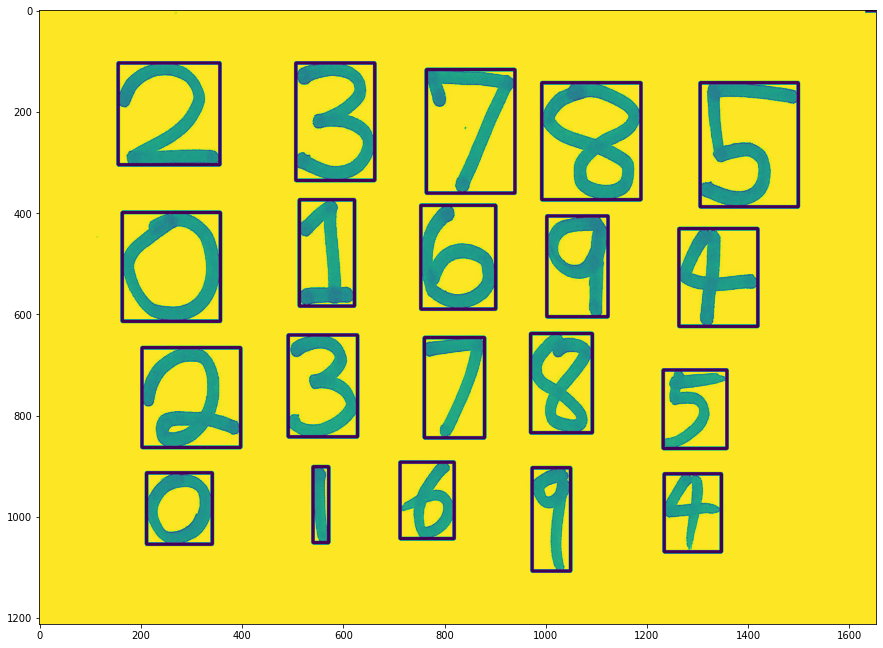

In [0]:
img_result = []
img_for_class = img_gray.copy()
img_temp = img_gray.copy()

margin_pixel = 20

for rect in rects:
  #Save each number area // rect[1] = x , rect[0]= y  , x&y is changed when cv2.boundingRect. However, it is fine in cv2
  temp = img_for_class[rect[1]- margin_pixel : rect[1] + rect[3] + margin_pixel , rect[0]-margin_pixel : rect[0] + rect[2] + margin_pixel] 
  img_result.append(temp)   # it doesn't work directly adding

  #Draw the rectangles
  cv2.rectangle(img_temp,(rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0,255,0),5)

#Drawing the image file
plt.figure(figsize=(15,12))
plt.imshow(img_temp)
            

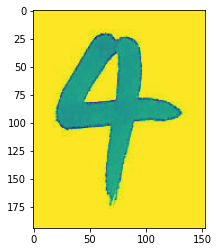

In [0]:
#Drawing one for test
plt.imshow(img_result[0])

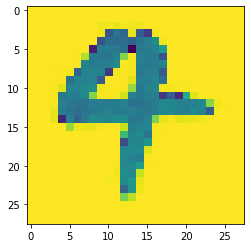

In [0]:
#resize into 28,28 because 
plt.imshow(cv2.resize(img_result[0],(28,28)))

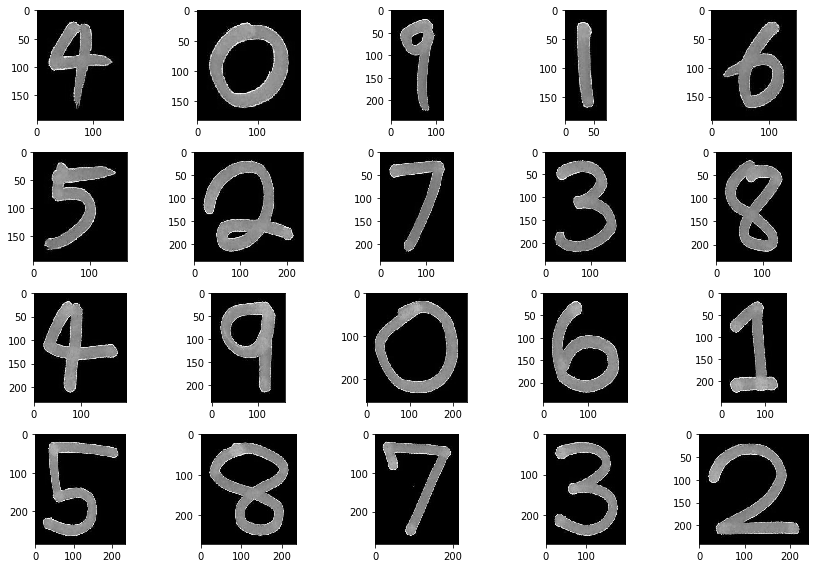

In [0]:
#display all original size numbers
count = 0
nrows = 4
ncols = 5

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1

    plt.subplot(nrows, ncols,count)
    plt.imshow(n, cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

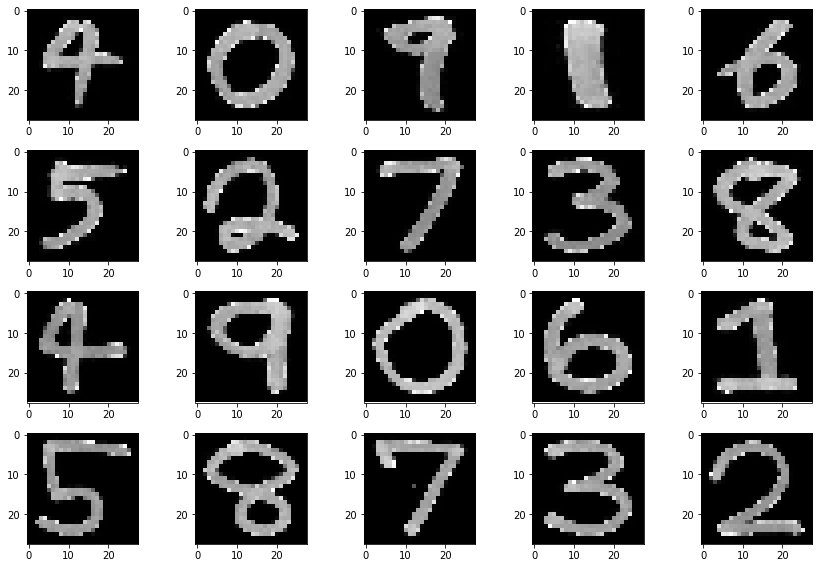

In [0]:
#display resized all numbers
count=0
nrows = 4
ncols = 5

plt.figure(figsize=(12,8))

for n in img_result:
  count +=1
  plt.subplot(nrows, ncols, count)
  plt.imshow(cv2.resize(n,(28,28)), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

## Load MNIST Model

In [0]:
#first mount Google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
##Load MNIST MOdel
import tensorflow as tf

DATA_PATH = "/content/drive/My Drive/Colab Notebooks/"
model = tf.keras.models.load_model(DATA_PATH+"256_CNN.model")

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
fla

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


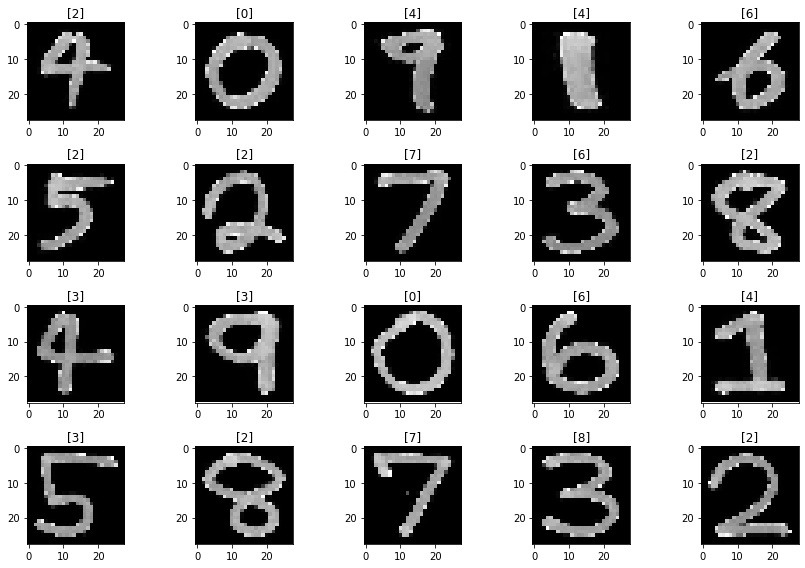

In [0]:
count = 0
nrows = 4
ncols = 5

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    
    test_num = cv2.resize(n, (28,28))
    test_num = test_num.astype('float32') / 255.
    
    plt.imshow(test_num, cmap='Greys', interpolation='nearest');
    
    test_num = test_num.reshape((1, 28, 28, 1))
    plt.title(model.predict_classes(test_num))
    
plt.tight_layout()
plt.show()
